In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('train_modelling.csv')
df

,full_sq,max_floor,build_year,num_room,state,product_type,indust_part,school_education_centers_raion,hospital_beds_raion,sport_objects_raion,...,avg_dist_to_amenities,area_density,area_diff_sq,median_max_floor,max_floor_ratio,cpi,gdp_annual_growth,usdrub,invest_fixed_capital_per_cap,price_doc
0,43.0,12.0,1981.0,2.0,1981.0,0,0.000070,5,240.0,7,...,3.464517,0.024279,47.993349,12.0,1.019467,354.0,0.045037,29.0048,73976.19863,5850000
1,34.0,12.0,1981.0,2.0,1981.0,0,0.049637,8,229.0,6,...,2.336570,0.012029,47.993349,18.0,1.019467,354.0,0.045037,28.9525,73976.19863,6000000
2,43.0,12.0,1981.0,2.0,1981.0,0,0.118537,7,1183.0,5,...,0.778705,0.021153,47.993349,12.0,1.019467,354.0,0.045037,28.8082,73976.19863,5700000
3,89.0,12.0,1981.0,2.0,1981.0,0,0.069753,10,990.0,17,...,2.509353,0.014183,47.993349,17.0,1.019467,353.2,0.045037,28.9655,73976.19863,13100000
4,77.0,12.0,1981.0,2.0,1981.0,0,0.037316,9,562.0,25,...,1.658507,0.012880,47.993349,7.0,1.019467,353.2,0.045037,29.4625,73976.19863,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44.0,9.0,1975.0,2.0,3.0,0,0.300323,4,990.0,10,...,2.748987,0.017459,38.000000,12.0,0.750000,489.5,0.007065,55.2655,131403.00000,7400000
30467,86.0,9.0,1935.0,4.0,3.0,0,0.000078,4,1046.0,29,...,1.383730,0.010315,76.000000,17.0,0.529412,489.5,0.007065,55.2655,131403.00000,25000000
30468,45.0,20.0,1981.0,1.0,1.0,1,0.007122,0,990.0,0,...,5.626612,0.000157,44.000000,17.0,1.176471,489.5,0.007065,55.2655,131403.00000,6970959
30469,64.0,15.0,2003.0,2.0,2.0,0,0.093443,8,3300.0,11,...,1.297676,0.012994,53.000000,17.0,0.882353,489.5,0.007065,55.2655,131403.00000,13500000


In [3]:
X = df.drop("price_doc", axis=1)
y = df["price_doc"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Minimun MSE 15726043646628.049 at K = 7


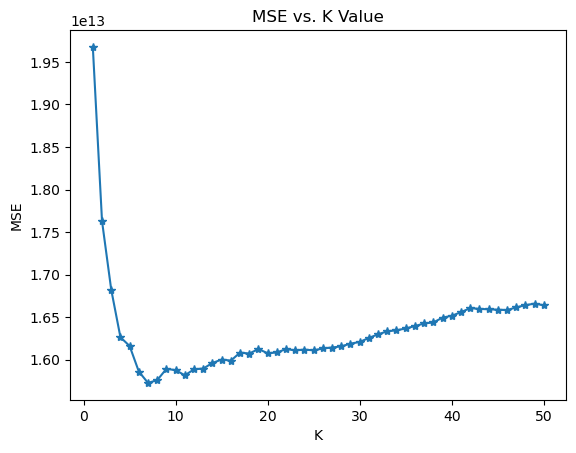

In [5]:
mse = []
for i in range(1,51):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    
plt.figure()
plt.plot(range(1,51), mse, marker='*')
plt.title('MSE vs. K Value')
plt.xlabel('K')
plt.ylabel('MSE')
print("Minimun MSE" , min(mse), "at K =", mse.index(min(mse))+1)

In [6]:
param_grid = {'n_neighbors': np.arange(1, 51)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='neg_mean_squared_error')

In [7]:
best_k = grid_search.best_params_['n_neighbors']
best_mse = -grid_search.best_score_
print("Best k value: ", best_k)
print("Best MSE: ", best_mse)

Best k value:  8
Best MSE:  16418834390339.6


In [8]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

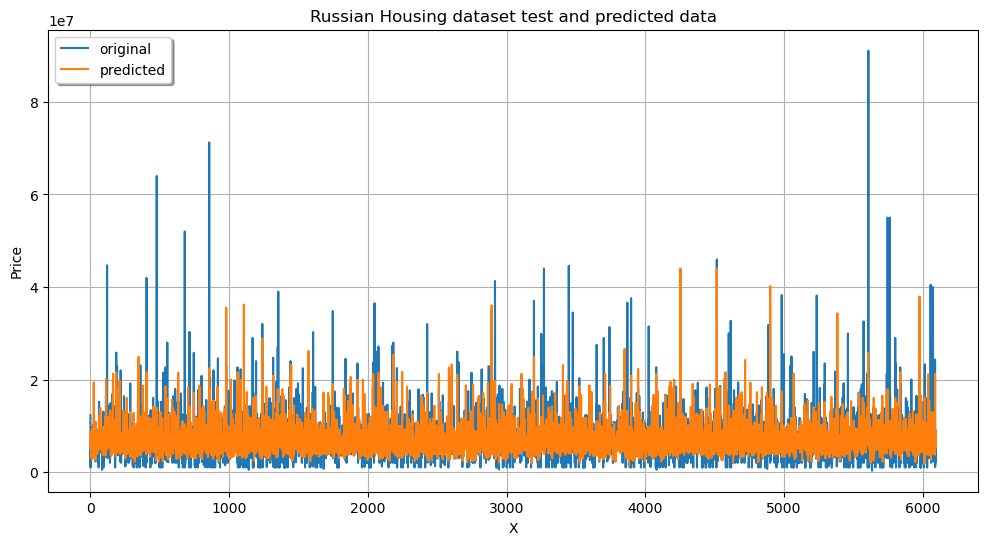

In [9]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Russian Housing dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()